In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)

In [3]:
city_data.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [4]:
ride_data.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [5]:
# Combine the data into a single dataset
data = pd.merge(city_data, ride_data, on ="city")


In [6]:
# Display the data table for preview
data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data
* Average Fare ($) Per City
* Total Number of Rides Per City
* Total Number of Drivers Per City
* City Type (Urban, Suburban, Rural)

In [7]:
# Obtain the x and y coordinates for each of the three city types
data_agg = data.groupby(["city","type"]).agg({"fare":"mean", "ride_id":"count", "driver_count":"sum" }).reset_index()
data_agg.head()

,city,type,fare,ride_id,driver_count
0,Amandaburgh,Urban,24.641667,18,216
1,Barajasview,Urban,25.332273,22,572
2,Barronchester,Suburban,36.422500,16,176
3,Bethanyland,Suburban,32.956111,18,396
4,Bradshawfurt,Rural,40.064000,10,70


In [18]:
urban = data_agg[data_agg.type=="Urban"]
rural = data_agg[data_agg.type=="Rural"]
suburban = data_agg[data_agg.type=="Suburban"]

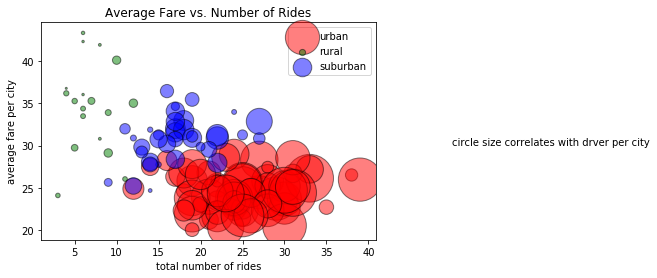

In [25]:
# Build the scatter plots for each city types
def type_to_color(city_type):
    if city_type=="Rural":
        return "green"
    if city_type=="Urban":
        return "red"
    if city_type=="Suburban":
        return "blue"
#Urban    
plt.scatter(x = urban.ride_id,  
            y = urban.fare,
            c = "red",
            s = urban.driver_count,
            alpha = 0.5, edgecolors = "black")
#Rural
plt.scatter(x = rural.ride_id,  
            y = rural.fare,
            c = "green",
            s = rural.driver_count,
            alpha = 0.5, edgecolors = "black")
#Suburban
plt.scatter(x = suburban.ride_id,  
            y = suburban.fare,
            c = "blue",
            s = suburban.driver_count,
            alpha = 0.5, edgecolors = "black")


# Incorporate the other graph properties
plt.title("Average Fare vs. Number of Rides")
plt.xlabel("total number of rides")
plt.ylabel("average fare per city")

# Create a legend
plt.legend(loc = "upper right",labels = ["urban","rural","suburban"])

# Incorporate a text label regarding circle size
plt.text(50,30,"circle size correlates with drver per city")

# Save Figure
plt.savefig("average_fare_vs_number_of_rides.png")

## Total Fares by City Type

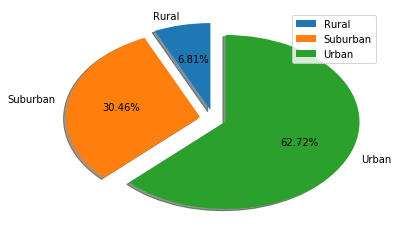

In [37]:
# Calculate Type Percents
fare_sum = data[["type","fare"]].groupby("type").sum()

# Build Pie Chart
plt.pie(fare_sum.fare,labels = fare_sum.index, autopct = "%.2f%%",shadow = True, explode = (0.1,0.1,0.1), startangle = 90)
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("pie_chart_total_fares.png")

## Total Rides by City Type

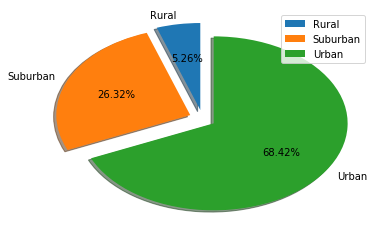

In [38]:
# Calculate Ride Percents
ride_total = data[["type","ride_id"]].groupby("type").count()

# Build Pie Chart
plt.pie(ride_total.ride_id,labels = ride_total.index, autopct = "%.2f%%",shadow = True, explode = (0.1,0.1,0.1), startangle = 90)
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("pie_chart_total_rides.png")

## Total Drivers by City Type

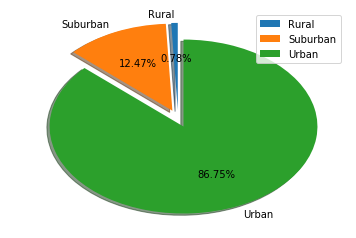

In [41]:
# Calculate Driver Percents
driver_total = data[["type","driver_count"]].groupby("type").sum()

# Build Pie Charts
plt.pie(driver_total.driver_count,labels = driver_total.index, autopct = "%.2f%%", shadow = True, explode = (0.1,0.1,0.1), startangle = 90
    )
plt.legend(loc = "upper right")

# Save Figure
plt.savefig("pie_chart_total_driver.png")